# What is the most optimal skill to learn for Data Analysts?
### Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [93]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
dataset = load_dataset('lukebarousse/data_jobs', split='train')
df = dataset.to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [94]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Calculate Percent of Job Postings that Have Skills

In [95]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]
df_DA_skills[0:10]

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Median Salary vs Percent Skill Demand

In [96]:
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

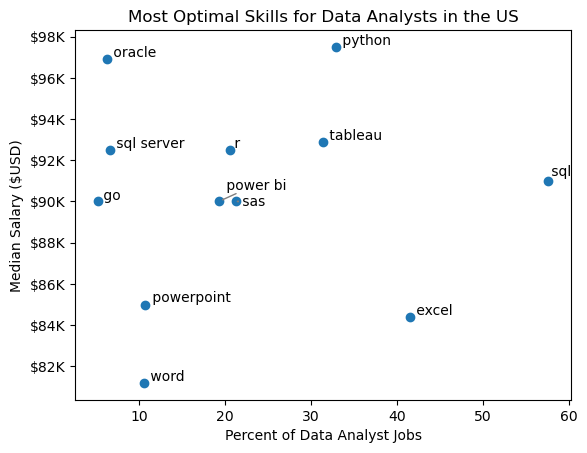

In [97]:
from adjustText import adjust_text
plt.scatter(data=df_DA_skills_high_demand, x='skill_percent', y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
texts = []
for txt in df_DA_skills_high_demand.index:
    texts.append(plt.text(df_DA_skills_high_demand.loc[txt, 'skill_percent'], df_DA_skills_high_demand.loc[txt, 'median_salary'], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Coloring by Technology

In [98]:
df_technology = df['job_type_skills'].dropna().drop_duplicates()

technology_dict = {}
for row in df_technology:
    dict_row = ast.literal_eval(row)
    for technology, skills in dict_row.items():
        if technology in technology_dict:
            technology_dict[technology] += skills
        else:
            technology_dict[technology] = skills
# Remove duplicated skills in one technology
for technology in technology_dict:
    technology_dict[technology] = list(set(technology_dict[technology]))
technology_dict  

{'analyst_tools': ['spss',
  'ssrs',
  'excel',
  'msaccess',
  'esquisse',
  'cognos',
  'sap',
  'spreadsheet',
  'datarobot',
  'nuix',
  'ms access',
  'sharepoint',
  'microstrategy',
  'visio',
  'dax',
  'power bi',
  'looker',
  'sas',
  'sheets',
  'alteryx',
  'powerpoint',
  'outlook',
  'tableau',
  'powerbi',
  'ssis',
  'splunk',
  'qlik',
  'word'],
 'programming': ['pascal',
  'r',
  'dart',
  'objective-c',
  'lua',
  'solidity',
  'sql',
  't-sql',
  'apl',
  'visualbasic',
  'nosql',
  'go',
  'c++',
  'fortran',
  'crystal',
  'ruby',
  'mongodb',
  'visual basic',
  'vb.net',
  'clojure',
  'c#',
  'scala',
  'sass',
  'shell',
  'f#',
  'typescript',
  'erlang',
  'css',
  'golang',
  'swift',
  'sas',
  'haskell',
  'java',
  'c',
  'ocaml',
  'elixir',
  'julia',
  'bash',
  'no-sql',
  'mongo',
  'python',
  'delphi',
  'kotlin',
  'rust',
  'javascript',
  'assembly',
  'lisp',
  'php',
  'powershell',
  'perl',
  'groovy',
  'html',
  'vba',
  'cobol',
  'mat

In [99]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,spss
0,analyst_tools,ssrs
0,analyst_tools,excel
0,analyst_tools,msaccess
0,analyst_tools,esquisse
...,...,...
9,sync,symphony
9,sync,webex
9,sync,ringcentral
9,sync,microsoft teams


In [100]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, how='inner', left_on='job_skills', right_on='skills')
df_DA_skills_tech[:10]

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


In [104]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]
df_DA_skills_tech_high_demand = df_DA_skills_tech_high_demand.drop_duplicates(subset='skills')
df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word
10,286,92500.00,6.574713,databases,sql server


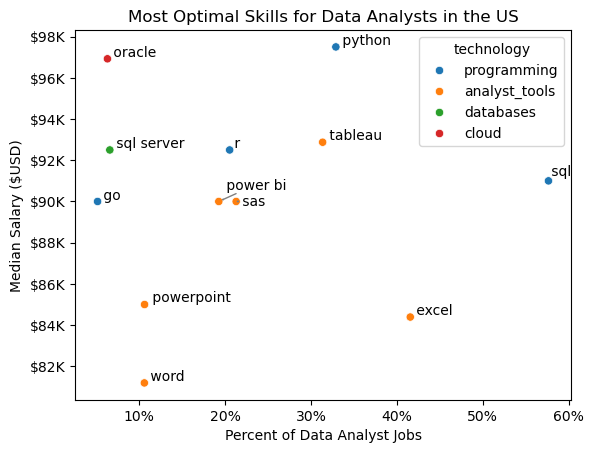

In [107]:
from adjustText import adjust_text
sns.scatterplot(data=df_DA_skills_tech_high_demand, x='skill_percent', y='median_salary', hue='technology')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
texts = []
for i, txt in enumerate(df_DA_skills_tech_high_demand['skills']):
    texts.append(plt.text(df_DA_skills_tech_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.show()